# Task 1 Data Loading and data preparation

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# Download the data and create the dataset

x_train = pd.read_csv('Dataset/x_train.csv', names = ['website_name','text'])
x_test = pd.read_csv('Dataset/x_test.csv', names = ['website_name','text'])
y_train = pd.read_csv('Dataset/y_train.csv', names = ['is_positive_sentiment'])
y_test = pd.read_csv('Dataset/y_test.csv', names = ['is_positive_sentiment'])

In [3]:
# Checking the rows and columns of the imported data

print('x_train')
print(x_train.info())
print('------------------------------')
print('y_train')
print(y_train.info())
print('------------------------------')
print('x_test')
print(x_test.info())
print('------------------------------')
print('y_test')
print(y_test.info())

x_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   website_name  2400 non-null   object
 1   text          2400 non-null   object
dtypes: object(2)
memory usage: 37.6+ KB
None
------------------------------
y_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   is_positive_sentiment  2400 non-null   int64
dtypes: int64(1)
memory usage: 18.9 KB
None
------------------------------
x_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   website_name  600 non-null    object
 1   text          600 non-null    object
dtypes: object(2)
memor

In [4]:
# define Clean Text function
def clean_text(text):
#     change all text to lowercase and remove special characters
    text = text.lower()
    text = re.sub('\W', ' ', text)
    return text

In [5]:
# apply clean_text function

x_train['text'] = x_train['text'].apply(lambda x: clean_text(x))
x_test['text'] = x_test['text'].apply(lambda x: clean_text(x))

In [6]:
# Checking the inout data and the labels
# concat train set
train_data = pd.concat([x_train, y_train], axis=1)
print('training set:',train_data.shape)

# positive review
positive_review = train_data[train_data['is_positive_sentiment']==1]['text']
print('positive review example:',positive_review.values[1])

# negative review
negative_review = train_data[train_data['is_positive_sentiment']==0]['text']
print('negative review example:',negative_review.values[1])

training set: (2400, 3)
positive review example: i was very excited to get this headset because i thought it was really cute 
negative review example: that one didn t work either 


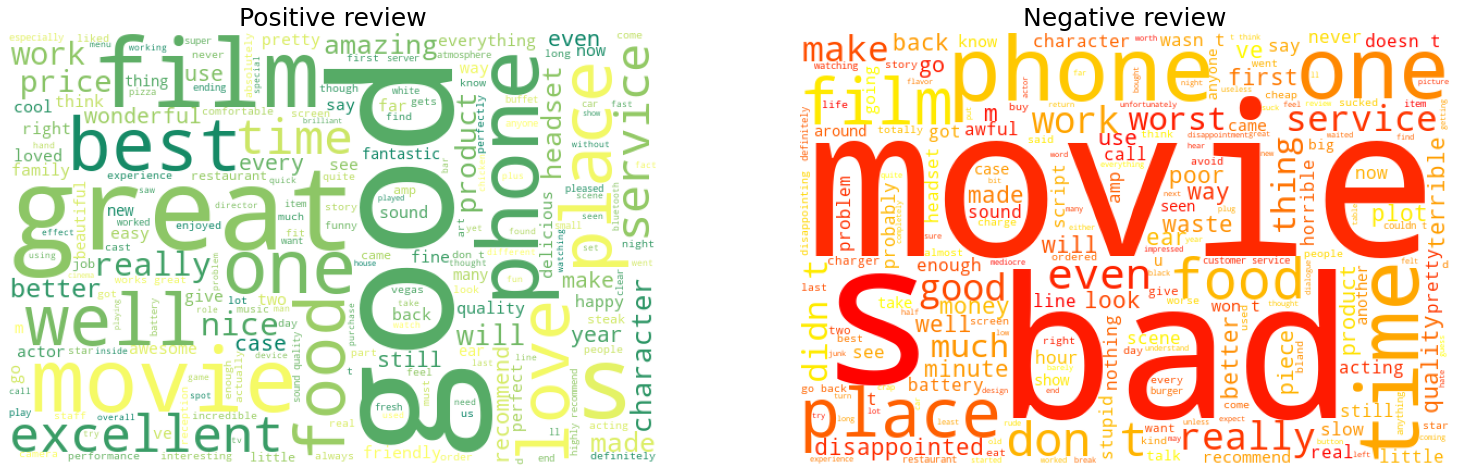

In [7]:
# Wordcloud for observe the words

import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
positive = WordCloud( background_color='white',
                    colormap='summer',
                    width=600,
                    height=400).generate(" ".join(positive_review))
ax1.imshow(positive)
ax1.axis('off')
ax1.set_title('Positive review',fontsize=25);

negative = WordCloud( background_color='white',
                    colormap='autumn_r',
                    width=600,
                    height=400).generate(" ".join(negative_review))
ax2.imshow(negative)
ax2.axis('off')
ax2.set_title('Negative review',fontsize=25);

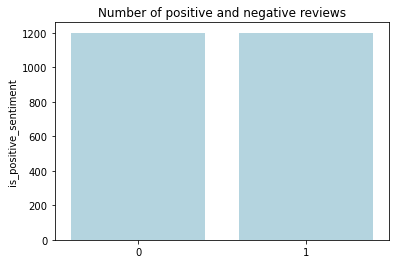

In [8]:
# Observe the number of class labels in case that the data is imbalance

import seaborn as sns

data_labels = sns.barplot(data = train_data, 
              x = train_data['is_positive_sentiment'].unique(), 
              y = train_data['is_positive_sentiment'].value_counts(),
              color = 'lightblue')
plt.title('Number of positive and negative reviews')
data_labels

In [9]:
# Tokenization
import itertools
import nltk 

# RegexpTokenizer`` splits a string into substrings using a regular expression.

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

x_train['text'] = x_train['text'].apply(lambda x: tokenizer.tokenize(x))
x_test['text'] = x_test['text'].apply(lambda x: tokenizer.tokenize(x))
print('example of tokenization\n',x_train['text'][0])
display(x_train.head())
display(x_test.head())

example of tokenization
 ['oh', 'and', 'i', 'forgot', 'to', 'also', 'mention', 'the', 'weird', 'color', 'effect', 'it', 'has', 'on', 'your', 'phone']


,website_name,text
0,amazon,"[oh, and, i, forgot, to, also, mention, the, w..."
1,amazon,"[that, one, didn, t, work, either]"
2,amazon,"[waste, of, 13, bucks]"
3,amazon,"[product, is, useless, since, it, does, not, h..."
4,amazon,"[none, of, the, three, sizes, they, sent, with..."


,website_name,text
0,amazon,"[it, only, recognizes, the, phone, as, its, st..."
1,amazon,"[disappointing, accessory, from, a, good, manu..."
2,amazon,"[the, one, big, drawback, of, the, mp3, player..."
3,amazon,"[this, particular, model, would, not, work, wi..."
4,amazon,"[if, the, two, were, seperated, by, a, mere, 5..."


In [10]:
# Remove stopwords
from nltk.corpus import stopwords

def obtain_stopwords(text):
    
#     Observe stopwords in the dataset
    
    stopword = [w for w in text if w in stopwords.words('english')]
    return stopword

def remove_stopwords(text):
    
#     Removing stopwords belonging to english language
    
    words = [w for w in text if w not in stopwords.words('english')]
    return words

x_train['stop_text'] = x_train['text'].apply(lambda x : obtain_stopwords(x))

x_train['text_no_stopword'] = x_train['text'].apply(lambda x : remove_stopwords(x))


In [11]:
# comparision of original text and text without stopword

print('original text:',' '.join(x_train['text'][1]))
print('stopword:',' '.join(x_train['stop_text'][1]))
print('text without stopword:',' '.join(x_train['text_no_stopword'][1]))

x_train = x_train.drop(['stop_text','text_no_stopword'],axis = 1)
display(x_train.head())

original text: that one didn t work either
stopword: that didn t
text without stopword: one work either


,website_name,text
0,amazon,"[oh, and, i, forgot, to, also, mention, the, w..."
1,amazon,"[that, one, didn, t, work, either]"
2,amazon,"[waste, of, 13, bucks]"
3,amazon,"[product, is, useless, since, it, does, not, h..."
4,amazon,"[none, of, the, three, sizes, they, sent, with..."


In [12]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

# combine the list of word for lemmatization
x_train['text'] = x_train['text'].apply(lambda x : combine_text(x))
x_test['text'] = x_test['text'].apply(lambda x : combine_text(x))

x_train['text'] = x_train['text'].apply(lemmatize_words)
x_test['text'] = x_test['text'].apply(lemmatize_words)

print('lemmatized word:', x_train['text'][3])
x_train.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/beeboossadee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


lemmatized word: product be useless since it do not have enough charge current to charge the 2 cellphones i be plan to use it with


,website_name,text
0,amazon,oh and i forget to also mention the weird colo...
1,amazon,that one didn t work either
2,amazon,waste of 13 buck
3,amazon,product be useless since it do not have enough...
4,amazon,none of the three size they send with the head...


# Task 2 – Feature representation, Bag of words

In [13]:
from sklearn.feature_extraction.text import (CountVectorizer,
                                             TfidfVectorizer)

In [14]:
# Countvectorizer Features for unigram

count_vectorizer = CountVectorizer(ngram_range = (1,1))
train_vectors = count_vectorizer.fit_transform(x_train['text'])

# handle Out-ot-Vocaburaly, this step will make the vocaburaly in training and test set equal
test_vectors = count_vectorizer.transform(x_test["text"])

print(f'x_train: {train_vectors.shape}\nx_test: {test_vectors.shape}')

x_train: (2400, 3861)
x_test: (600, 3861)


In [15]:
train_vec = pd.DataFrame(train_vectors.toarray(),
                           columns = count_vectorizer.get_feature_names_out())
test_vec = pd.DataFrame(test_vectors.toarray(),
                           columns = count_vectorizer.get_feature_names_out())
print('x_train')
display(train_vec.loc[11:16,'that':'them'])

x_train


,that,thats,the,theater,theatre,theatres,theatrical,theft,their,them
11,0,0,0,0,0,0,0,0,0,0
12,1,0,2,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0
14,1,0,2,0,0,0,0,0,0,1
15,0,0,1,0,0,0,0,0,0,0
16,0,0,2,0,0,0,0,0,0,0


In [16]:
# TFIDF Features   

tfidf = TfidfVectorizer(ngram_range=(1, 1))

train_tfidf = tfidf.fit_transform(x_train['text'])

# handle Out-ot-Vocaburaly, this step will make the vocaburaly in training and test set equal
test_tfidf = tfidf.transform(x_test["text"])

print(f'x_train: {train_tfidf.shape}\nx_test: {test_tfidf.shape}')

x_train: (2400, 3861)
x_test: (600, 3861)


In [17]:
train_tfidf_vec = pd.DataFrame(train_tfidf.toarray(),
                           columns = tfidf.get_feature_names_out())
test_tfidf_vec = pd.DataFrame(test_tfidf.toarray(),
                           columns = tfidf.get_feature_names_out())

print('x_train using TFIDF')
display(train_tfidf_vec.loc[11:16,'that':'them'])

x_train using TFIDF


,that,thats,the,theater,theatre,theatres,theatrical,theft,their,them
11,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
12,0.174422,0.0,0.185913,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
13,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
14,0.121065,0.0,0.129041,0.0,0.0,0.0,0.0,0.0,0.0,0.18476
15,0.000000,0.0,0.148393,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
16,0.000000,0.0,0.146101,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [18]:
# remove stopword which have significantly decrease the size of vocabulary

tfidf_excldword = TfidfVectorizer(min_df = 10, # exclude rare word that appears less than 10 documents
                                max_df = 0.50, # exclude common word that appears more than 50% of documents
                                ) 
                        
train_tfidf_excldword = tfidf_excldword.fit_transform(x_train['text'])
test_tfidf_excldword = tfidf_excldword.transform(x_test["text"])

print(f'x_train: {train_tfidf_excldword.shape}\nx_test: {test_tfidf_excldword.shape}')

x_train: (2400, 379)
x_test: (600, 379)


In [19]:
excld_train_tfidf_vec = pd.DataFrame(train_tfidf_excldword.toarray(),
                           columns = tfidf_excldword.get_feature_names_out())
excld_test_tfidf_vec = pd.DataFrame(test_tfidf_excldword.toarray(),
                           columns = tfidf_excldword.get_feature_names_out())

display(excld_train_tfidf_vec.head())

,10,about,absolutely,act,actors,actually,after,again,all,almost,...,work,worse,worst,worth,would,write,year,years,you,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.342105
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.385848,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.354306,0.0,0.0,0.0,0.0,0.000000


# Task 3 – Classification and Evaluation

In [20]:
from sklearn.model_selection import (train_test_split,
                                    StratifiedKFold,
                                    cross_val_score,
                                    learning_curve,
                                    GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, 
                            precision_score, 
                            recall_score, 
                            f1_score,
                            classification_report,
                            ConfusionMatrixDisplay)

# using StratifiedKFold method to ensure that every fold have each class equally
cv = StratifiedKFold(n_splits = 10)

x = train_tfidf
y = y_train['is_positive_sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(f'X_train: {X_train.shape}\nX_val: {X_test.shape}\ny_train: {Y_train.shape}\ny_val: {Y_test.shape}\n')

for i, (train_index, test_index) in enumerate(cv.split(X_train,Y_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index.shape}")
    print(f"  Test:  index={test_index.shape}")

X_train: (1920, 3861)
X_val: (480, 3861)
y_train: (1920,)
y_val: (480,)

Fold 0:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 1:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 2:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 3:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 4:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 5:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 6:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 7:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 8:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 9:
  Train: index=(1728,)
  Test:  index=(192,)


# MultinomialNB

In [21]:
NB_model = MultinomialNB()

NB_model.fit(X_train, Y_train)

NB_y_pred = NB_model.predict(X_test)

NB_cvscores = cross_val_score(NB_model, 
                         X_train, 
                         Y_train, 
                         cv = cv,
                        scoring = 'accuracy')

print("Cross-validation scores:", NB_cvscores)
print("Mean cross-validation score:", np.mean(NB_cvscores),'\n')

print(classification_report(Y_test, NB_y_pred))


Cross-validation scores: [0.8125     0.8125     0.79166667 0.83854167 0.80729167 0.73958333
 0.8125     0.80729167 0.85416667 0.78125   ]
Mean cross-validation score: 0.8057291666666668 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       237
           1       0.85      0.81      0.83       243

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480



# RandomForestClassifier

In [22]:
RFC_model = RandomForestClassifier()

RFC_model.fit(X_train, Y_train)
RFC_y_pred = RFC_model.predict(X_test)

RFC_cvscores = cross_val_score(RFC_model, 
                         X_train, 
                         Y_train, 
                         cv = cv,
                        scoring = 'accuracy')
print("Cross-validation scores:", RFC_cvscores)
print("Mean cross-validation score:", np.mean(RFC_cvscores),'\n')

print(classification_report(Y_test, RFC_y_pred))


Cross-validation scores: [0.83333333 0.77083333 0.71875    0.76041667 0.765625   0.73958333
 0.82291667 0.73958333 0.74479167 0.76041667]
Mean cross-validation score: 0.765625 

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       237
           1       0.82      0.75      0.78       243

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



# LogisticRegression

In [23]:
LR_model = LogisticRegression()

LR_model.fit(X_train, Y_train)
LR_y_pred = LR_model.predict(X_test)

LR_cvscores = cross_val_score(LR_model, 
                         X_train, 
                         Y_train, 
                         cv = cv, 
                         scoring = 'accuracy')

print("Cross-validation scores:", LR_cvscores)
print("Mean cross-validation score:", np.mean(LR_cvscores),'\n')

print(classification_report(Y_test, LR_y_pred))

Cross-validation scores: [0.83333333 0.80208333 0.78645833 0.80729167 0.8125     0.76041667
 0.85416667 0.78645833 0.82291667 0.8125    ]
Mean cross-validation score: 0.8078125 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       237
           1       0.88      0.81      0.84       243

    accuracy                           0.84       480
   macro avg       0.85      0.84      0.84       480
weighted avg       0.85      0.84      0.84       480



In [24]:
# compare models accuracy scores

NB_train_result = pd.DataFrame({'MultinomialNB': {
                        'accuracy_score': accuracy_score(Y_test, NB_y_pred),
                        'precision_score': precision_score(Y_test, NB_y_pred),
                        'recall_score': recall_score(Y_test, NB_y_pred),
                        'f1_score': f1_score(Y_test, NB_y_pred),
                        'mean_cross_validation': np.mean(NB_cvscores)}})

RFC_train_result = pd.DataFrame({'RandomForestClassifier': {
                        'accuracy_score': accuracy_score(Y_test, RFC_y_pred),
                        'precision_score': precision_score(Y_test, RFC_y_pred),
                        'recall_score': recall_score(Y_test, RFC_y_pred),
                        'f1_score': f1_score(Y_test, RFC_y_pred),
                        'mean_cross_validation': np.mean(RFC_cvscores)}})

LR_train_result = pd.DataFrame({'LogisticRegression': {
                        'accuracy_score': accuracy_score(Y_test, LR_y_pred),
                        'precision_score': precision_score(Y_test, LR_y_pred),
                        'recall_score': recall_score(Y_test, LR_y_pred),
                        'f1_score': f1_score(Y_test, LR_y_pred),
                        'mean_cross_validation': np.mean(LR_cvscores)}})

train_result = pd.concat([NB_train_result, RFC_train_result, LR_train_result], axis = 1)  


In [25]:
train_result

,MultinomialNB,RandomForestClassifier,LogisticRegression
accuracy_score,0.833333,0.791667,0.843750
f1_score,0.831224,0.784483,0.839400
mean_cross_validation,0.805729,0.765625,0.807813
precision_score,0.852814,0.823529,0.875000
recall_score,0.810700,0.748971,0.806584


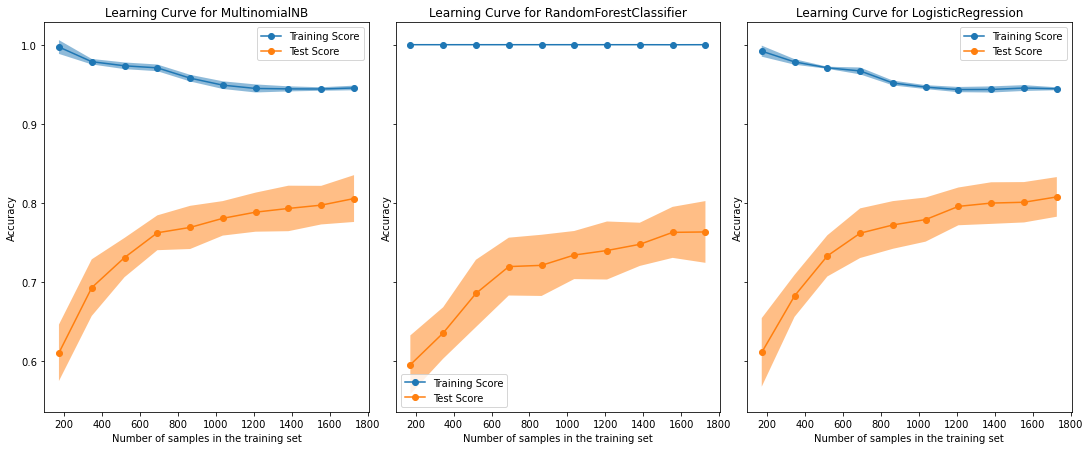

In [26]:
# Learning curve

from sklearn.model_selection import LearningCurveDisplay

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 6), sharey = True)
fig.tight_layout()

common_params = {
    "X": X_train,
    "y": Y_train,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": cv,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([NB_model, RFC_model, LR_model]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax = ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

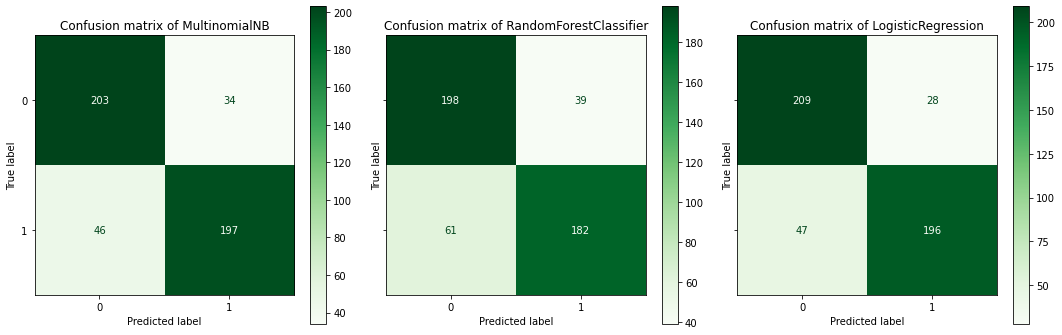

In [27]:
# confusion matrix of the train set

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5), sharey = True)
fig.tight_layout()

titles = ['Confusion matrix of MultinomialNB',
         'Confusion matrix of RandomForestClassifier',
         'Confusion matrix of LogisticRegression']

for ax_idx, y_pred in enumerate([NB_y_pred, RFC_y_pred, LR_y_pred]):
    ConfusionMatrixDisplay.from_predictions(Y_test, y_pred ,cmap = 'Greens', ax = ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].set_title(titles[ax_idx])

# Hyperparameter tuning

In [28]:
# using GridSearchCV

parameter_grid = {
    'vect__max_df': [0.2, 0.5, 1.0],
    'vect__min_df': [1, 3, 5, 10],
    'vect__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'vect__norm': ["l1", "l2"],
    'vect__stop_words' : ["english", None],
    'clf__solver' : ['liblinear', 'sag'],
    'clf__penalty' : ['l2'],
    'clf__C' : [100, 10, 1.0],
    'clf__max_iter': [5000]
}

pipeline = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', LogisticRegression())])

gridsearch = GridSearchCV(pipeline, 
                 param_grid = parameter_grid,
                 cv = cv,
                 scoring = 'accuracy',
                 error_score='raise')

gridsearch.fit(x_train['text'], y_train['is_positive_sentiment'])
print(gridsearch.best_params_)

{'clf__C': 100, 'clf__max_iter': 5000, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'vect__max_df': 0.2, 'vect__min_df': 1, 'vect__ngram_range': (1, 2), 'vect__norm': 'l2', 'vect__stop_words': None}


In [29]:
# apply parameters

tfidf_tuned = TfidfVectorizer(max_df = 0.2,
                              min_df = 1,
                              ngram_range = (1,2),
                             norm = 'l2') 
                        
train_tfidf_tuned = tfidf_tuned.fit_transform(x_train['text'])

# transform the test set to obtain the words that not in training set
test_tfidf_tuned = tfidf_tuned.transform(x_test["text"])

print(f'x_train: {train_tfidf_tuned.shape}\nx_test: {test_tfidf_tuned.shape}')

x_train: (2400, 19657)
x_test: (600, 19657)


In [30]:
# split the tuned vectorized training set

x = train_tfidf_tuned
y = y_train['is_positive_sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

print(f'X_train: {X_train.shape}\nX_val: {X_test.shape}\ny_train: {Y_train.shape}\ny_val: {Y_test.shape}\n')

for i, (train_index, test_index) in enumerate(cv.split(X_train,Y_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index.shape}")
    print(f"  Test:  index={test_index.shape}")

X_train: (1920, 19657)
X_val: (480, 19657)
y_train: (1920,)
y_val: (480,)

Fold 0:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 1:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 2:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 3:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 4:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 5:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 6:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 7:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 8:
  Train: index=(1728,)
  Test:  index=(192,)
Fold 9:
  Train: index=(1728,)
  Test:  index=(192,)


In [31]:
# apply model parameter

LR_model_tuned = LogisticRegression(C = 100,
                             max_iter = 5000,
                             penalty = 'l2',
                             solver = 'sag')

LR_model_tuned.fit(X_train, Y_train)
LR_y_pred_tuned = LR_model_tuned.predict(X_test)

LR_cvscores_tuned = cross_val_score(LR_model_tuned, 
                         X_train, 
                         Y_train, 
                         cv = cv, 
                         scoring = 'accuracy')

print("Cross-validation scores:", LR_cvscores_tuned)
print("Mean cross-validation score:", np.mean(LR_cvscores_tuned))

print(classification_report(Y_test, LR_y_pred_tuned))

Cross-validation scores: [0.83854167 0.82291667 0.8125     0.828125   0.80729167 0.8125
 0.84375    0.82291667 0.85416667 0.828125  ]
Mean cross-validation score: 0.8270833333333332
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       237
           1       0.86      0.82      0.84       243

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



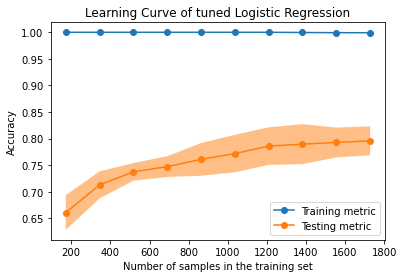

In [32]:
LearningCurveDisplay.from_estimator(LR_model_tuned, **common_params)
plt.title('Learning Curve of tuned Logistic Regression')
plt.show()

In [33]:
tuned_LR_scores = train_result.drop(['MultinomialNB','RandomForestClassifier'], axis = 1)

tuned_LR_train_result = pd.DataFrame({'LogisticRegression_after_tuning': {
                        'accuracy_score': accuracy_score(Y_test, LR_y_pred_tuned),
                        'precision_score': precision_score(Y_test, LR_y_pred_tuned),
                        'recall_score': recall_score(Y_test, LR_y_pred_tuned),
                        'f1_score': f1_score(Y_test, LR_y_pred_tuned),
                        'mean_cross_validation': np.mean(LR_cvscores_tuned)}})

tuned_LR_scores = pd.concat([tuned_LR_scores,tuned_LR_train_result], axis = 1)

In [34]:
tuned_LR_scores

,LogisticRegression,LogisticRegression_after_tuning
accuracy_score,0.843750,0.841667
f1_score,0.839400,0.840336
mean_cross_validation,0.807813,0.827083
precision_score,0.875000,0.858369
recall_score,0.806584,0.823045


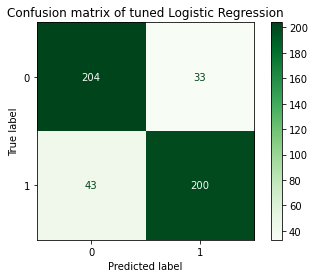

In [35]:
ConfusionMatrixDisplay.from_predictions(Y_test, LR_y_pred_tuned ,cmap = 'Greens')
plt.title('Confusion matrix of tuned Logistic Regression')
plt.show()

# Test the model

In [36]:
LR_y_pred_test_tuned = LR_model_tuned.predict(test_tfidf_tuned)

# Create the dataframe for comparison later
LR_test_result_tuned = pd.DataFrame({'LogisticRegression_test': {
                        'accuracy_score': accuracy_score(y_test, LR_y_pred_test_tuned),
                        'precision_score': precision_score(y_test, LR_y_pred_test_tuned),
                        'recall_score': recall_score(y_test, LR_y_pred_test_tuned),
                        'f1_score': f1_score(y_test, LR_y_pred_test_tuned),
                        'mean_cross_validation': 'NA'}})

print(classification_report(y_test, LR_y_pred_test_tuned))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       300
           1       0.86      0.80      0.83       300

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600



In [37]:
train_test_compare = pd.concat([LR_train_result,tuned_LR_train_result,LR_test_result_tuned], axis = 1)
train_test_compare = train_test_compare.rename(columns = {'LogisticRegression':'LogisticRegression_before_tuning'})
train_test_compare

,LogisticRegression_before_tuning,LogisticRegression_after_tuning,LogisticRegression_test
accuracy_score,0.843750,0.841667,0.835
f1_score,0.839400,0.840336,0.828423
mean_cross_validation,0.807813,0.827083,NA
precision_score,0.875000,0.858369,0.862816
recall_score,0.806584,0.823045,0.796667


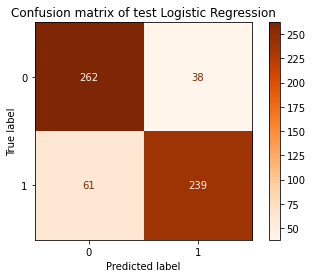

In [38]:
# confusion matrix of the test set

ConfusionMatrixDisplay.from_predictions(y_test, LR_y_pred_test_tuned ,cmap = 'Oranges')
plt.title('Confusion matrix of test Logistic Regression')
plt.show()

# example sentence of FP/FN

In [39]:
# pred result dataframe
x_test = pd.concat([x_test, y_test], axis=1)
x_test['model_pred'] = LR_model_tuned.predict(test_tfidf_tuned)
x_test

,website_name,text,is_positive_sentiment,model_pred
0,amazon,it only recognize the phone as its storage device,0,1
1,amazon,disappoint accessory from a good manufacturer,0,1
2,amazon,the one big drawback of the mp3 player be that...,0,0
3,amazon,this particular model would not work with my m...,0,0
4,amazon,if the two be seperated by a mere 5 ft i start...,0,0
...,...,...,...,...
595,yelp,everything be fresh and delicious,1,1
596,yelp,name,1,0
597,yelp,pretty awesome place,1,1
598,yelp,the staff be great the ambiance be great,1,1


In [40]:
false_positive = x_test[(x_test['is_positive_sentiment'] == 0)& ~ (x_test['model_pred']  == 0)]
print('example of false positive:\n','-', false_positive['text'].iloc[17],'\n','-', false_positive['text'].iloc[20])
print(false_positive['website_name'].value_counts())

avr_len = false_positive['text'].apply(len)
avr_len = np.average(avr_len)

print('average text lenght:', avr_len)

display(false_positive.head())

example of false positive:
 - the plot simply rumble on like a machine desperately depend on the addition of new scenes 
 - the direct and the cinematography aren t quite as good
amazon    13
imdb      13
yelp      12
Name: website_name, dtype: int64
average text lenght: 66.8157894736842


,website_name,text,is_positive_sentiment,model_pred
0,amazon,it only recognize the phone as its storage device,0,1
1,amazon,disappoint accessory from a good manufacturer,0,1
11,amazon,my experience be terrible this be my fourth bl...,0,1
14,amazon,try to make a call on these be an exercise in ...,0,1
19,amazon,it also have a new problem,0,1


In [41]:
false_negative = x_test[(x_test['is_positive_sentiment'] == 1)& ~ (x_test['model_pred']  == 1)]
print('example of false negative:\n','-', false_negative['text'].iloc[2],'\n','-', false_negative['text'].iloc[3],'\n')
print(false_negative['website_name'].value_counts())

avr_len2 = false_negative['text'].apply(len)
avr_len2 = np.average(avr_len2)

print('average text lenght:', avr_len2)

display(false_negative.head())

example of false negative:
 - no shift no bubble no peel not even a scratch nothing i couldn t be more happier with my new one for the droid 
 - i be look for this headset for a long time and now that i ve get it i couldn t be happier 

yelp      23
imdb      20
amazon    18
Name: website_name, dtype: int64
average text lenght: 79.72131147540983


,website_name,text,is_positive_sentiment,model_pred
102,amazon,w810i be just superb,1,0
104,amazon,cheap but hey it work be pleasantly suprised g...,1,0
108,amazon,no shift no bubble no peel not even a scratch ...,1,0
109,amazon,i be look for this headset for a long time and...,1,0
111,amazon,the delivery be on time,1,0
